# Functionality of Helper Test

## Evironmental Preparation

In [81]:
import importlib
import tensorflow as tf
from keras.datasets import fashion_mnist

import source.model.helpers.image_classifier_visualizer as icv

In [82]:
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [83]:
train_data = train_data.astype('float32') / 255
test_data = test_data.astype('float32') / 255
train_data = tf.expand_dims(train_data, -1)  
test_data = tf.expand_dims(test_data, -1)

train_labels = tf.keras.utils.to_categorical(train_labels, len(class_names))
test_labels = tf.keras.utils.to_categorical(test_labels, len(class_names))

batch_size = 32
train_dataset = tf.data.Dataset.from_tensor_slices((train_data, train_labels)).batch(batch_size)
test_dataset = tf.data.Dataset.from_tensor_slices((test_data, test_labels)).batch(batch_size)


In [84]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(len(class_names), activation='softmax')
])

model.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

model.fit(train_dataset, epochs=1)

1875/1875 [==============================] - 3s 1ms/step - loss: 0.4941 - accuracy: 0.8230


In [85]:
predictions = model.predict(test_dataset)

313/313 [==============================] - 0s 582us/step


## Setup

In [86]:
def get_visualizer():
    importlib.reload(icv)
    visualizer = icv.ImageClassifierVisualizer(class_names)
    return visualizer

visualizer = get_visualizer()

## Test 1: Plot Images

In [87]:
visualizer = get_visualizer()
fig = visualizer.plot_images(train_dataset, n_rows=2, n_cols=3, title="Training Data")

## Test 2: Plot Class Specific Images

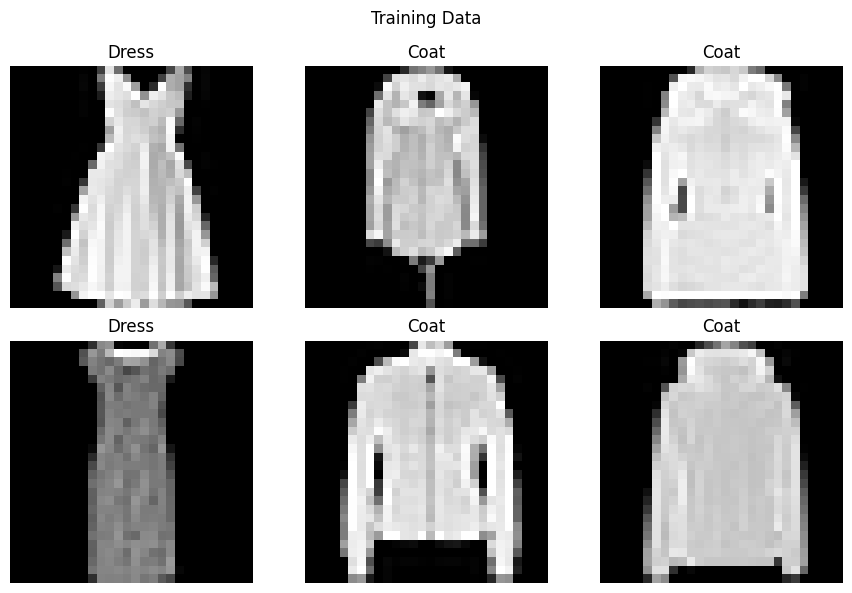

In [ ]:
visualizer = get_visualizer()
fig = visualizer.plot_class_specific_images(train_dataset, classes=['Dress', 'Coat'], n_rows=2, n_cols=3, title="Training Data")

## Test 3: Plot Image Comparisons

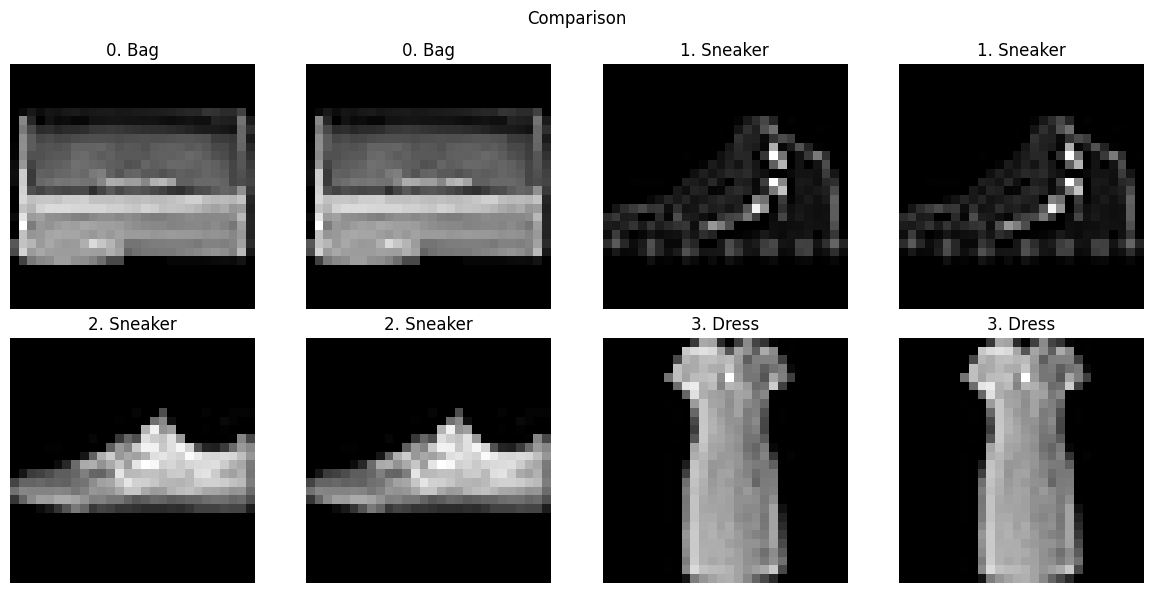

In [ ]:
visualizer = get_visualizer()
fig = visualizer.plot_image_comparisons(train_dataset, train_dataset, n_rows=2, n_cols=2, title="Comparison")

## Test 4: Plot Image Comparisons with Class Specific Images

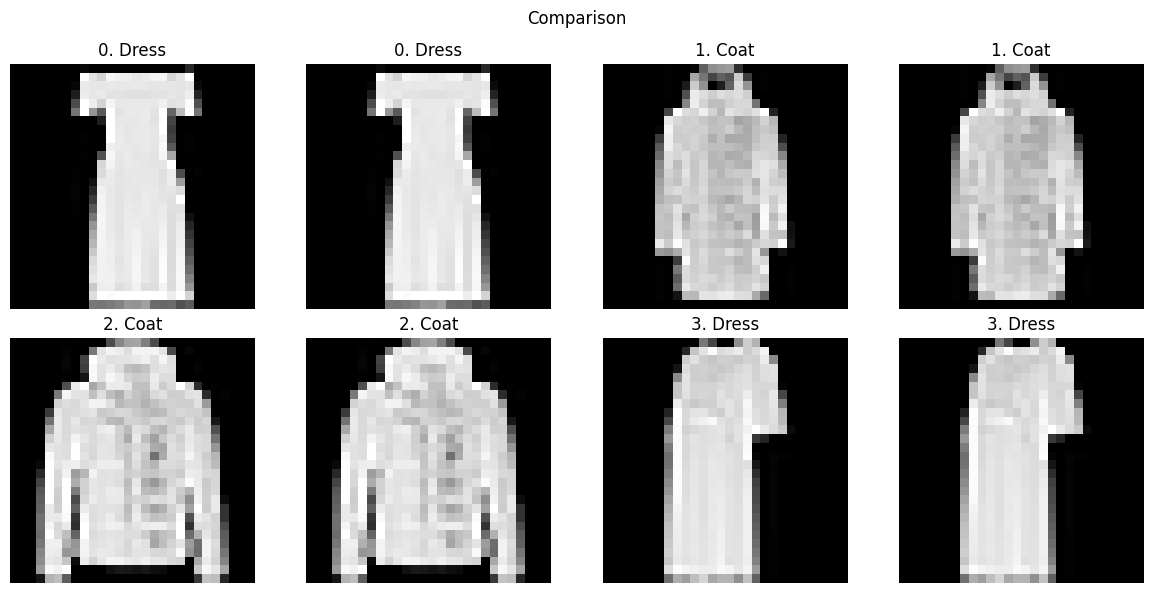

In [ ]:
visualizer = get_visualizer()
fig = visualizer.plot_class_specific_image_comparisons(train_dataset, train_dataset, classes=['Dress', 'Coat'], n_rows=2, n_cols=2, title="Comparison")

## Test 5: Plot Results

313/313 [==============================] - 0s 569us/step


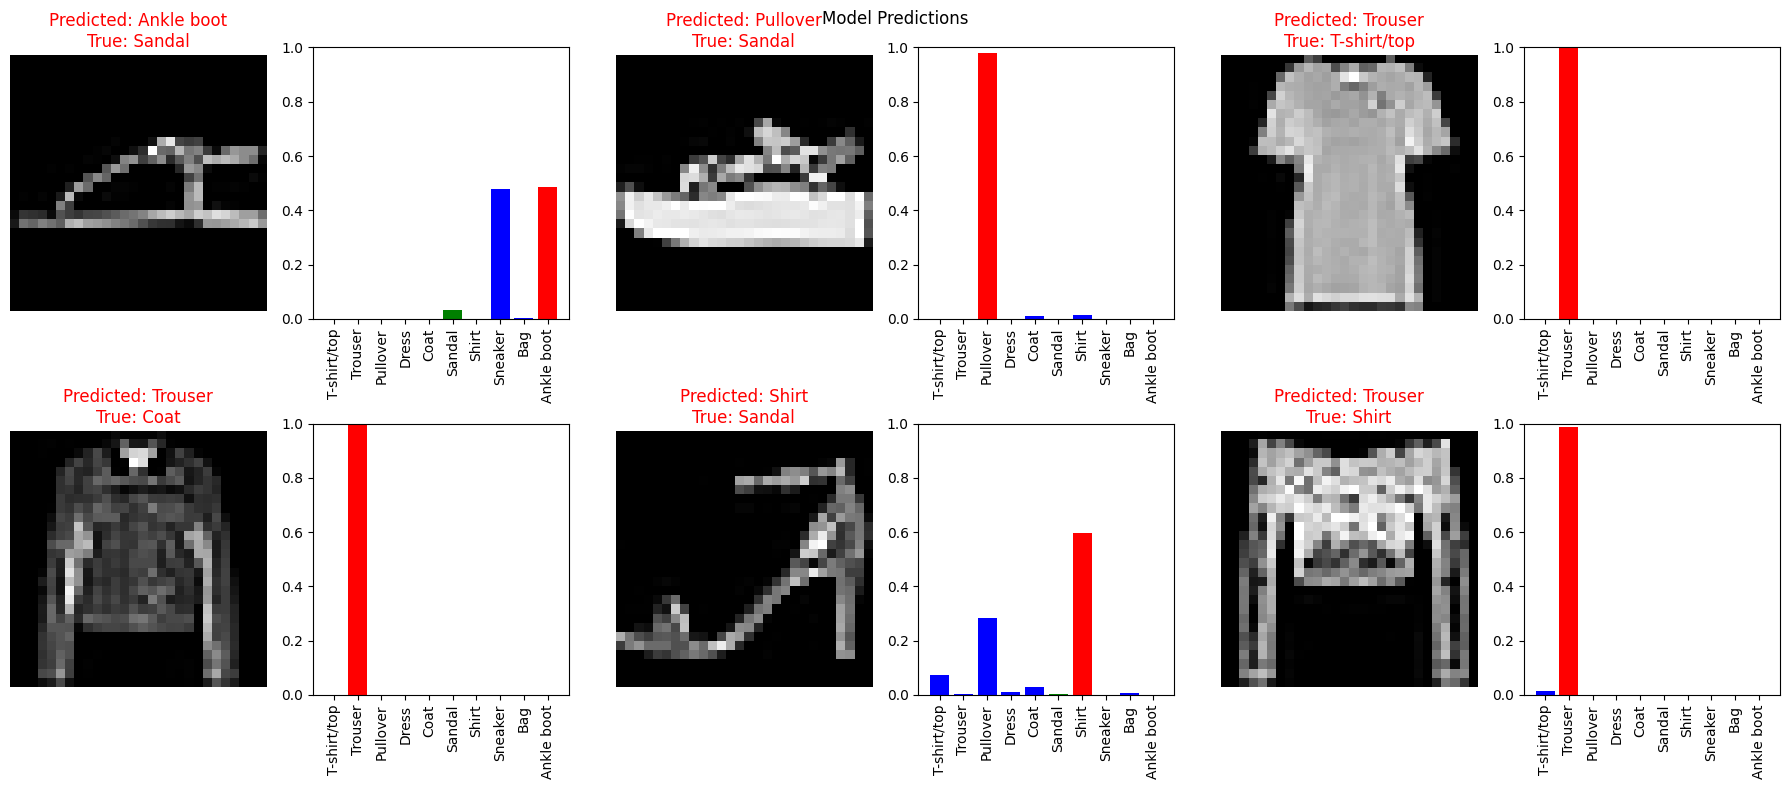

In [ ]:
visualizer = get_visualizer()
visualizer.calculate_model_predictions(model, test_dataset)
fig = visualizer.plot_results(n_rows=2, n_cols=3, title="Model Predictions")

## Test 6: Plot Results with Class Specific Images

313/313 [==============================] - 0s 548us/step


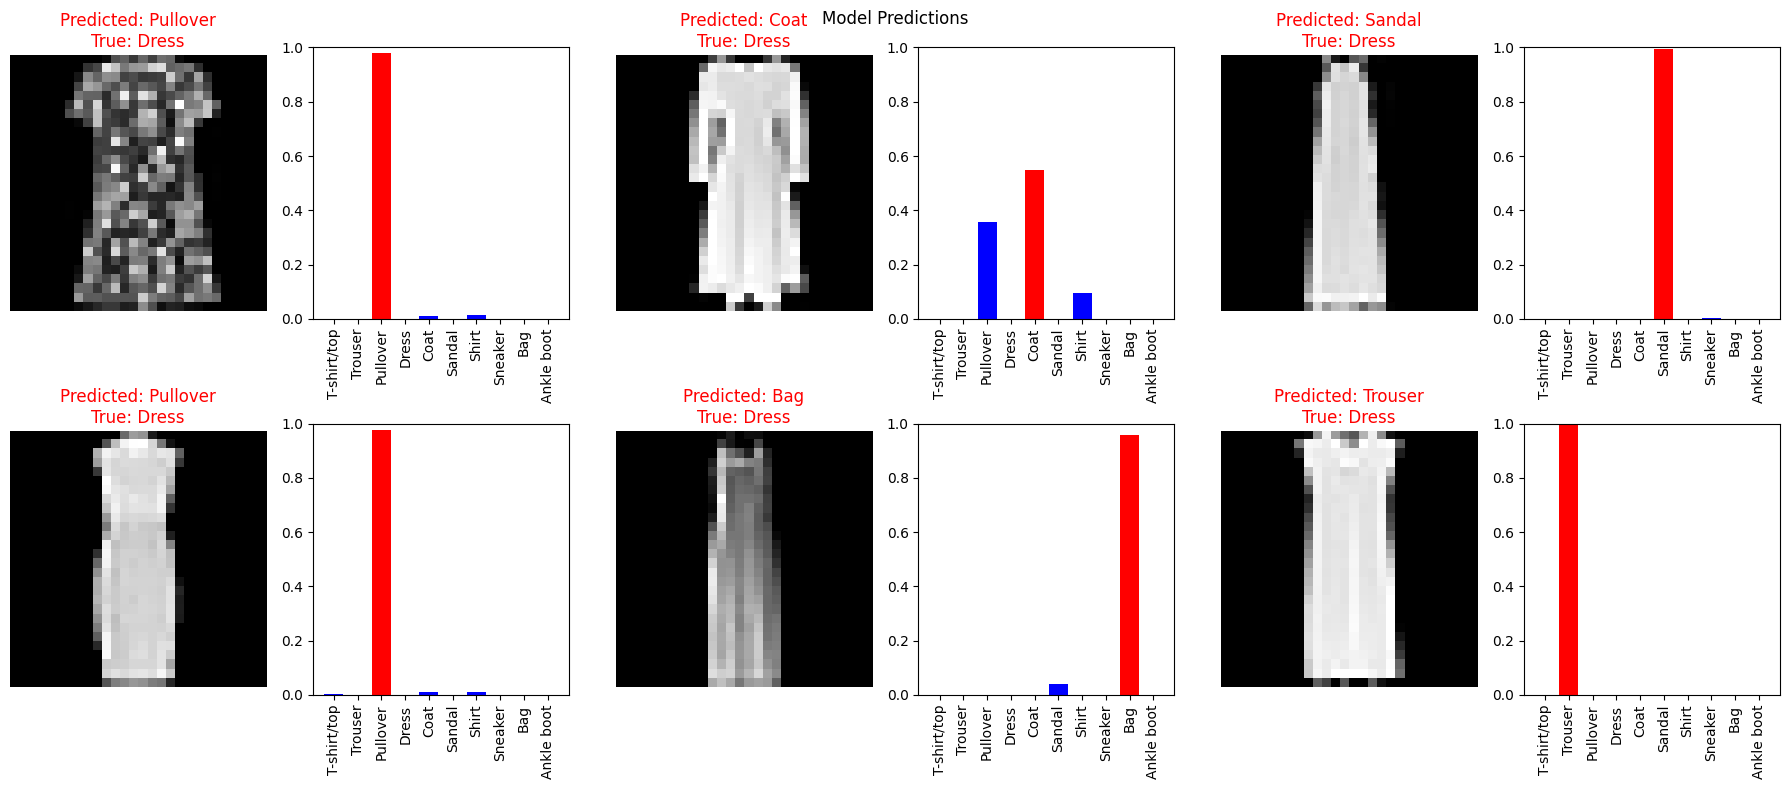

In [ ]:
visualizer = get_visualizer()
visualizer.calculate_model_predictions(model, test_dataset)
fig = visualizer.plot_class_specific_results(classes=['Dress', 'Coat'], n_rows=2, n_cols=3, title="Model Predictions")

## Test 7: Plot False Results

313/313 [==============================] - 0s 527us/step


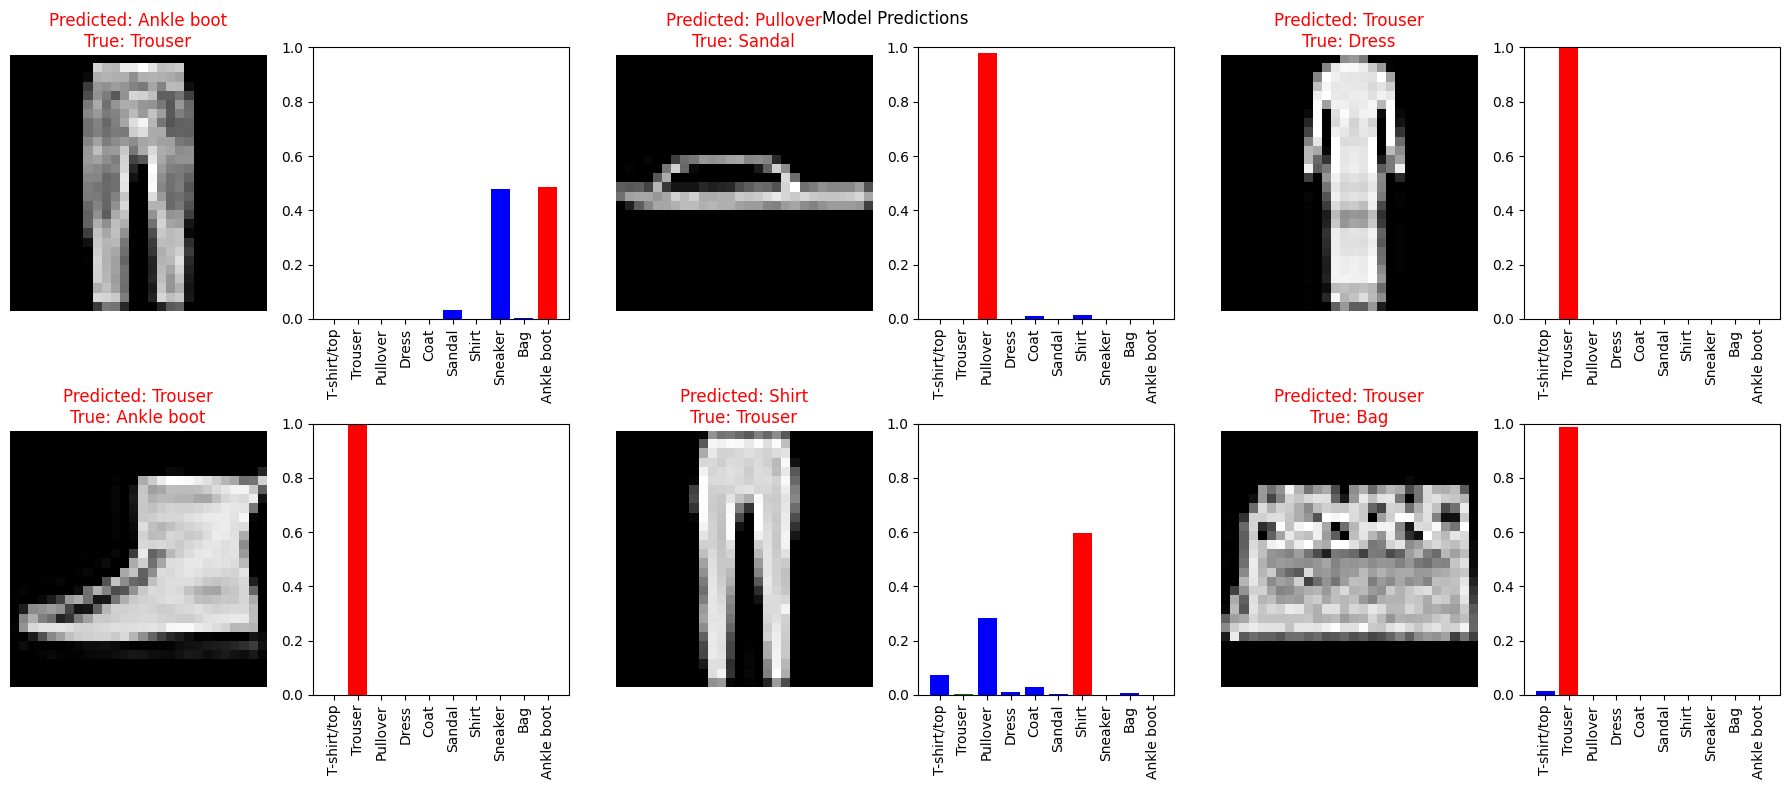

In [ ]:
visualizer = get_visualizer()
visualizer.calculate_model_predictions(model, test_dataset)
fig = visualizer.plot_false_results(n_rows=2, n_cols=3, title="Model Predictions")

## Test 8: Plot Confusion Matrix

313/313 [==============================] - 0s 558us/step


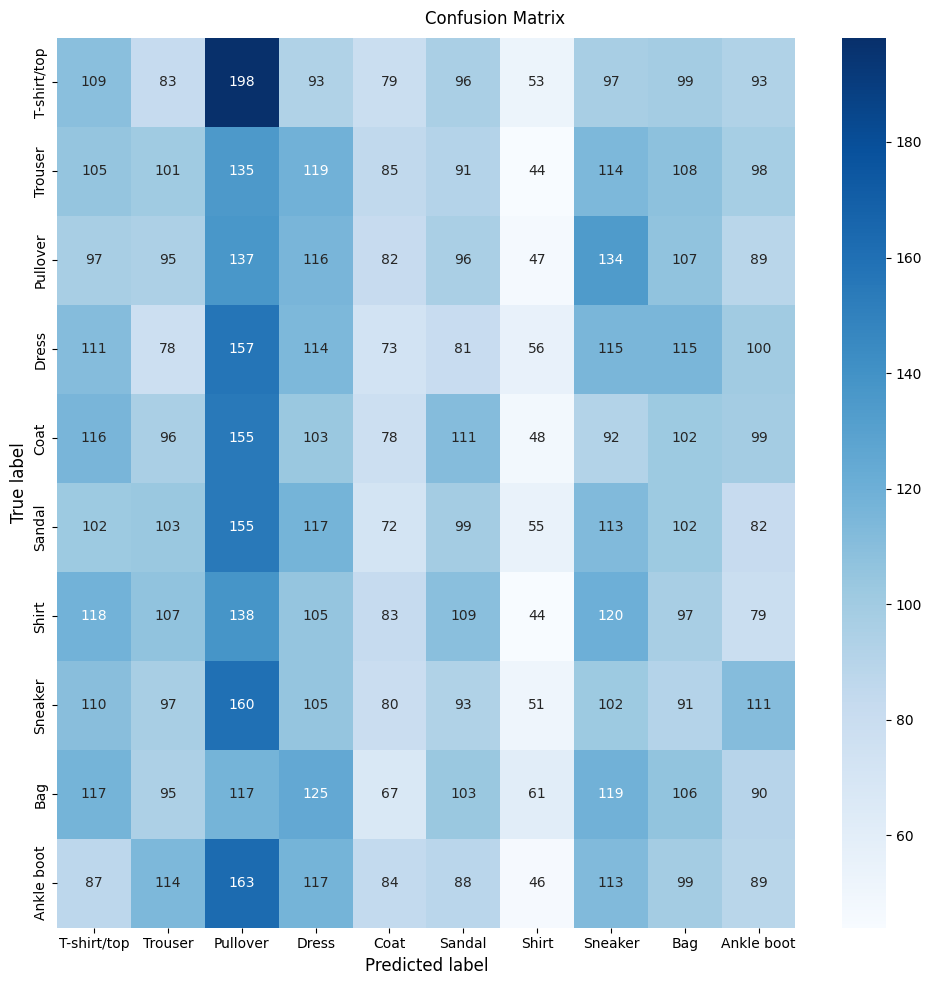

In [ ]:
visualizer = get_visualizer()
visualizer.calculate_model_predictions(model, test_dataset)
fig = visualizer.plot_confusion_matrix(title="Confusion Matrix")

## Test 9: Plot Evaluation Metrics

313/313 [==============================] - 0s 563us/step


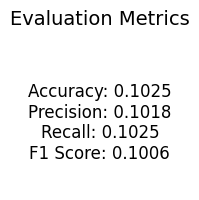

In [ ]:
visualizer = get_visualizer()
visualizer.calculate_model_predictions(model, test_dataset)
fig = visualizer.plot_evaluation_metrics(title="Evaluation Metrics")

## Test 9: Return Figure

In [ ]:
import matplotlib.pyplot as plt


313/313 [==============================] - 0s 563us/step


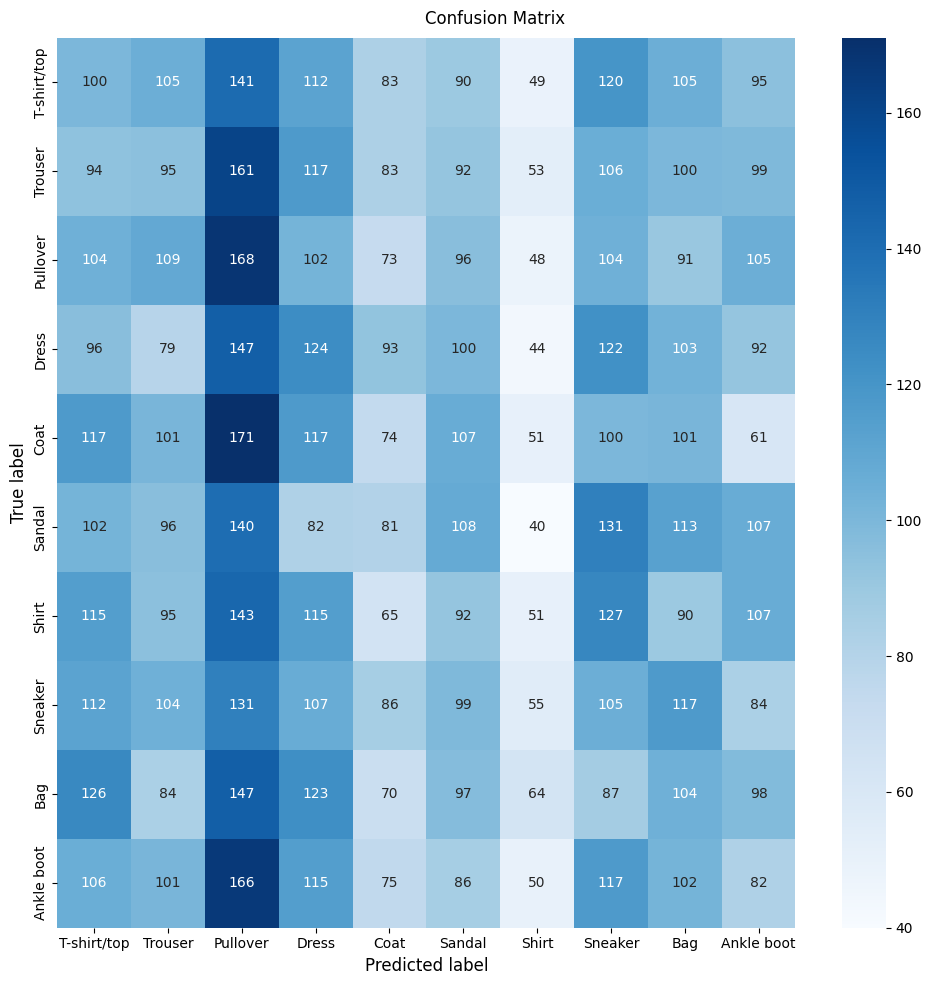

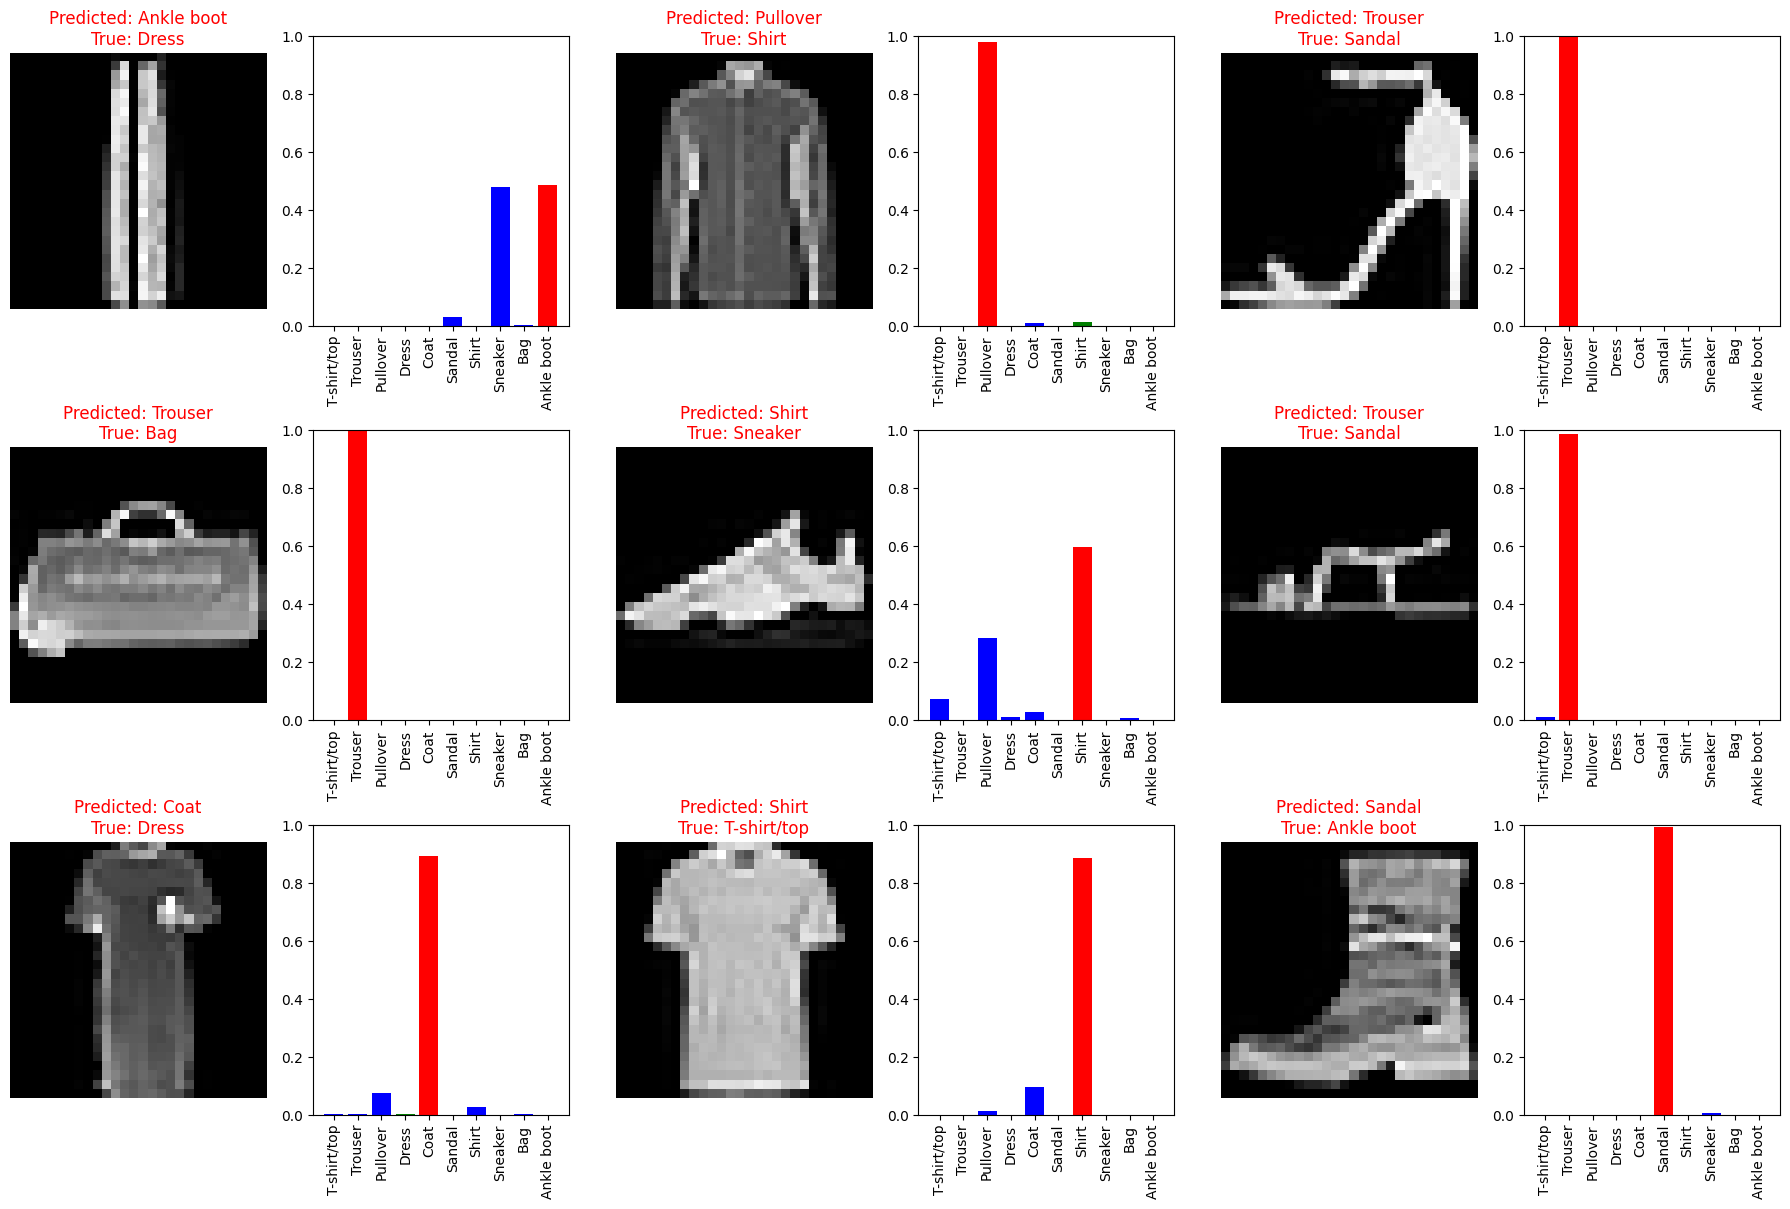

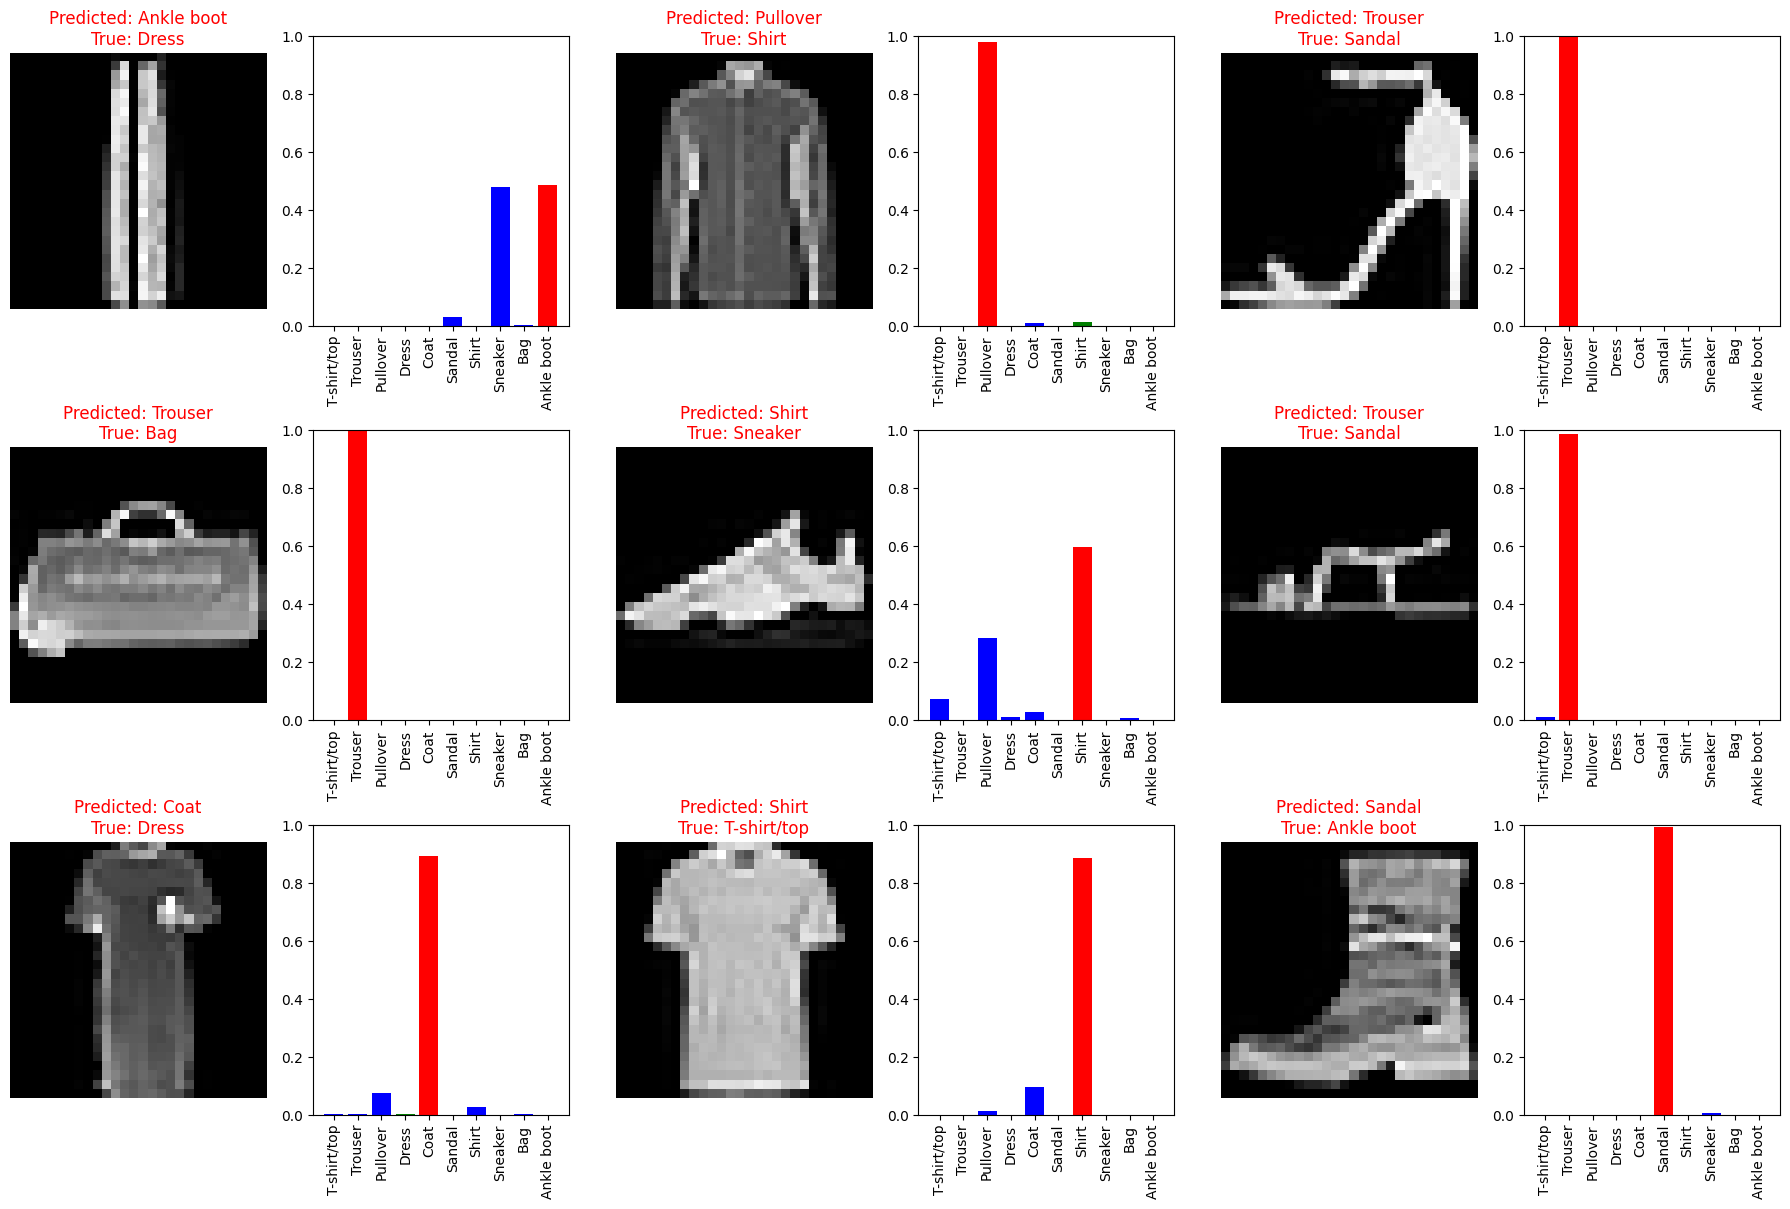

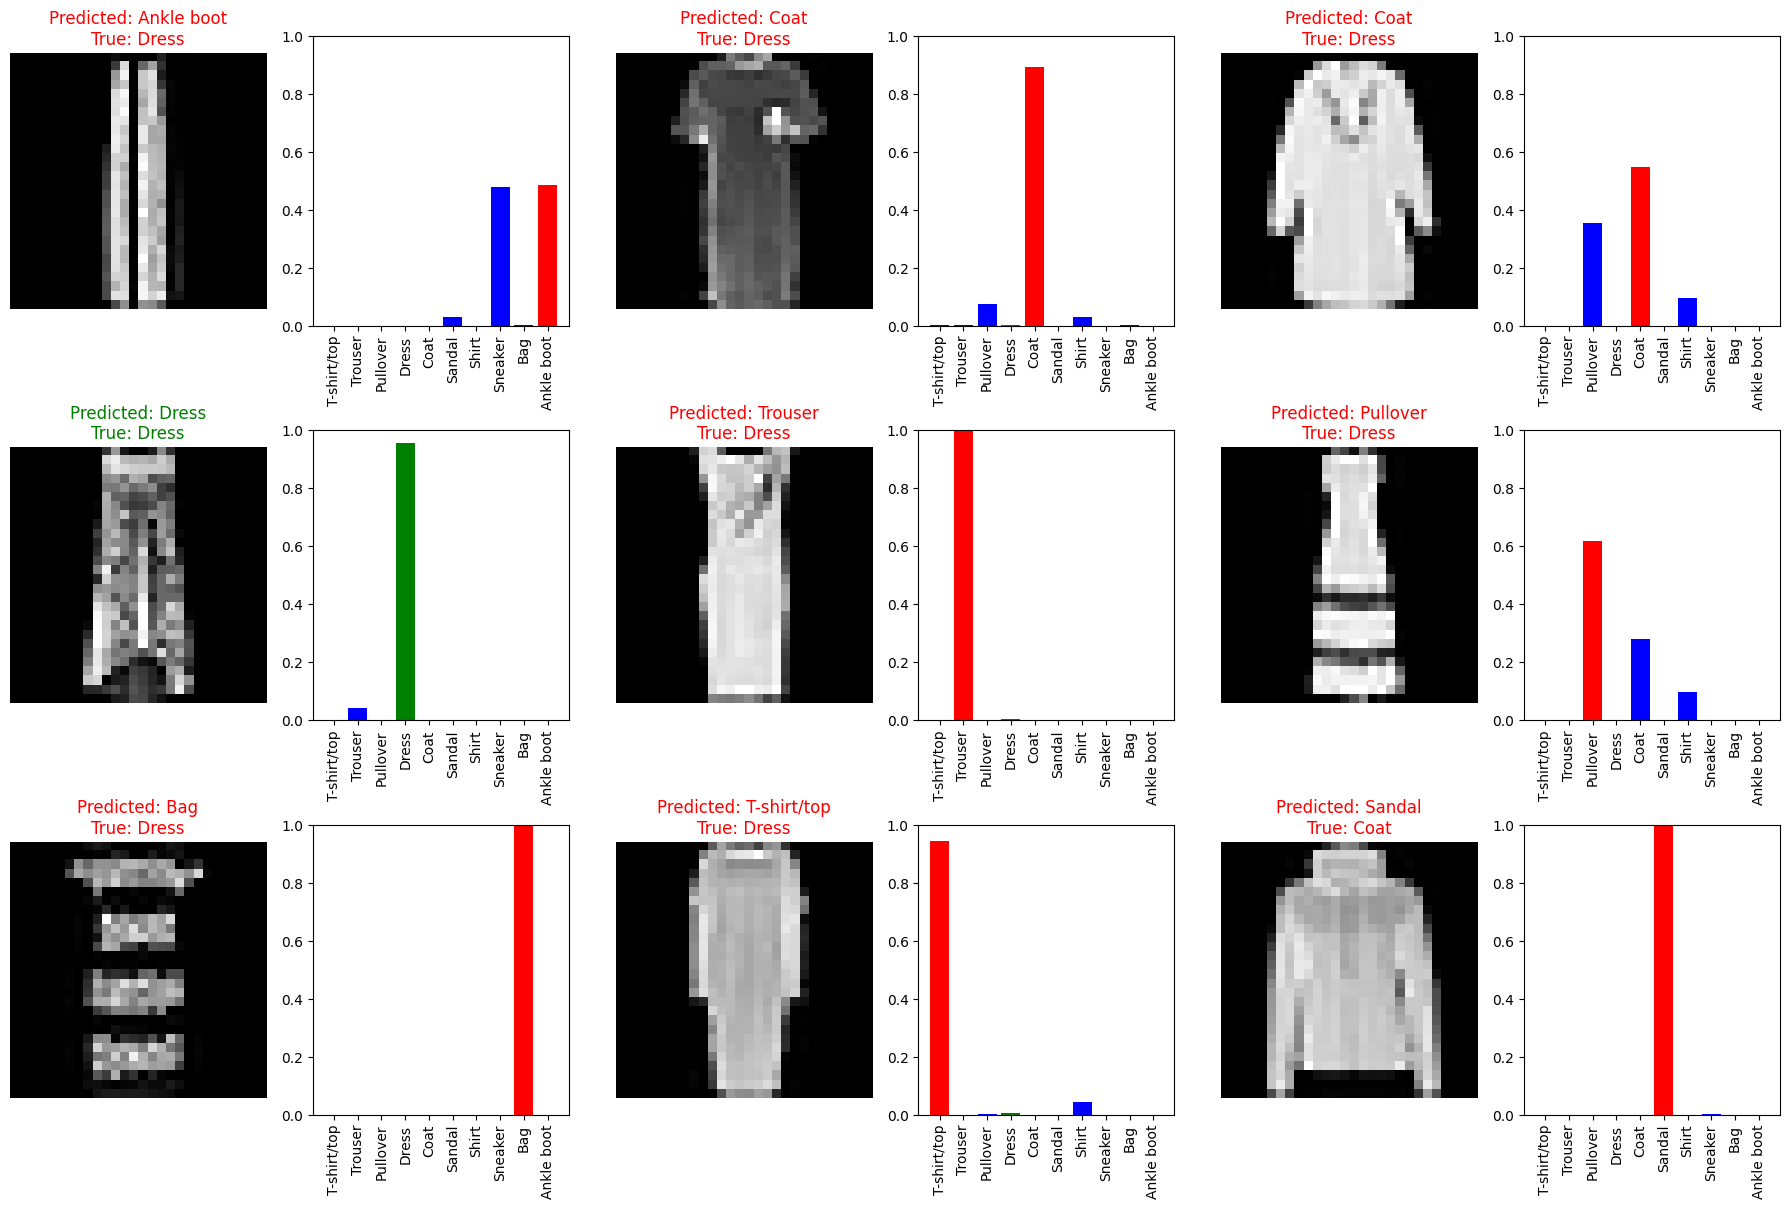

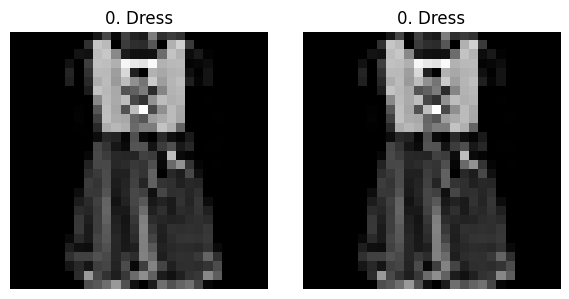

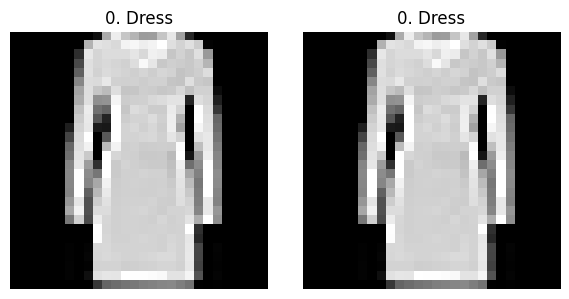

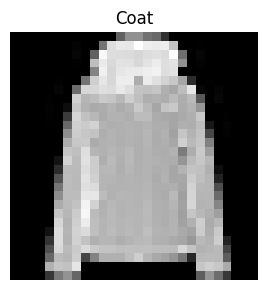

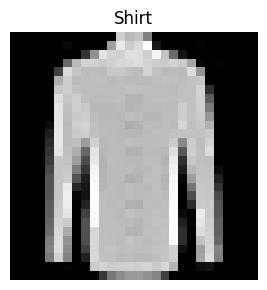

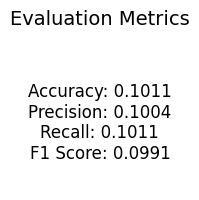

In [ ]:
visualizer = get_visualizer()
visualizer.calculate_model_predictions(model, test_dataset)

figures = [
    visualizer.plot_confusion_matrix(show_plot=False),
    visualizer.plot_results(show_plot=False),
    visualizer.plot_false_results(show_plot=False),
    visualizer.plot_class_specific_results(classes=['Dress', 'Coat'], show_plot=False),
    visualizer.plot_class_specific_image_comparisons(train_dataset, train_dataset, classes=['Dress', 'Coat'], show_plot=False),
    visualizer.plot_image_comparisons(train_dataset, train_dataset, show_plot=False),
    visualizer.plot_class_specific_images(train_dataset, classes=['Dress', 'Coat'], show_plot=False),
    visualizer.plot_images(train_dataset, show_plot=False),
    visualizer.plot_evaluation_metrics(show_plot=False)
]

for fig in figures:
    assert isinstance(fig, plt.Figure), f"Expected type plt.Figure but got {type(fig)}"

## Test 10: Binary Classification

### Setup

In [ ]:
import numpy as np
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

class_indices = np.array([0, 1])

# Get masks
train_mask = np.isin(train_labels, class_indices)
test_mask = np.isin(test_labels, class_indices)

# Apply masks
train_data = train_data[train_mask]
train_labels = train_labels[train_mask]
test_data = test_data[test_mask]
test_labels = test_labels[test_mask]

# Make Dataset and batch
batch_size = 32
train_dataset = tf.data.Dataset.from_tensor_slices((train_data, train_labels)).batch(batch_size)
test_dataset = tf.data.Dataset.from_tensor_slices((test_data, test_labels)).batch(batch_size)

In [ ]:
# Model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_2.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

model_2.fit(train_dataset, epochs=1)

375/375 [==============================] - 1s 1ms/step - loss: 0.6514 - accuracy: 0.9664


In [ ]:
import matplotlib.pyplot as plt


In [ ]:
print(class_names)

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


63/63 [==============================] - 0s 571us/step


[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[1.0000000e+00 2.2517571e-29]
[0. 1.]
[1.0000000e+00 1.8994541e-09]
[1.000000e+00 9.883459e-16]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[1.0000000e+00 2.2517571e-29]
[1.0000000e+00 1.8994541e-09]
[1.000000e+00 9.883459e-16]
[0. 1.]
[0. 1.]
[1.0000000e+00 2.9616383e-12]
[0. 1.]
[1.0000000e+00 2.2517571e-29]
[0. 1.]
[1.0000000e+00 1.8994541e-09]
[1.000000e+00 9.883459e-16]
[1.0000000e+00 2.9616383e-12]
[0. 1.]
[9.999948e-01 5.190519e-06]
[1.0000000e+00 2.1944394e-23]


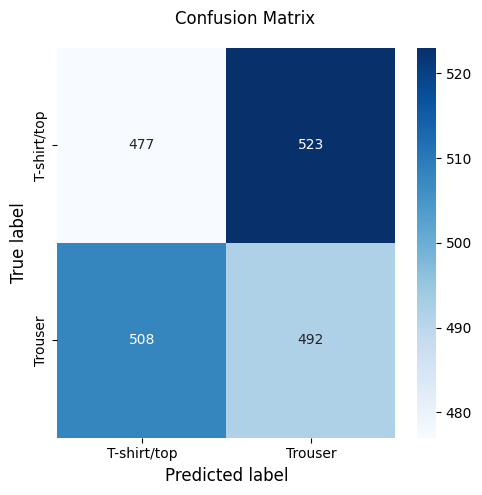

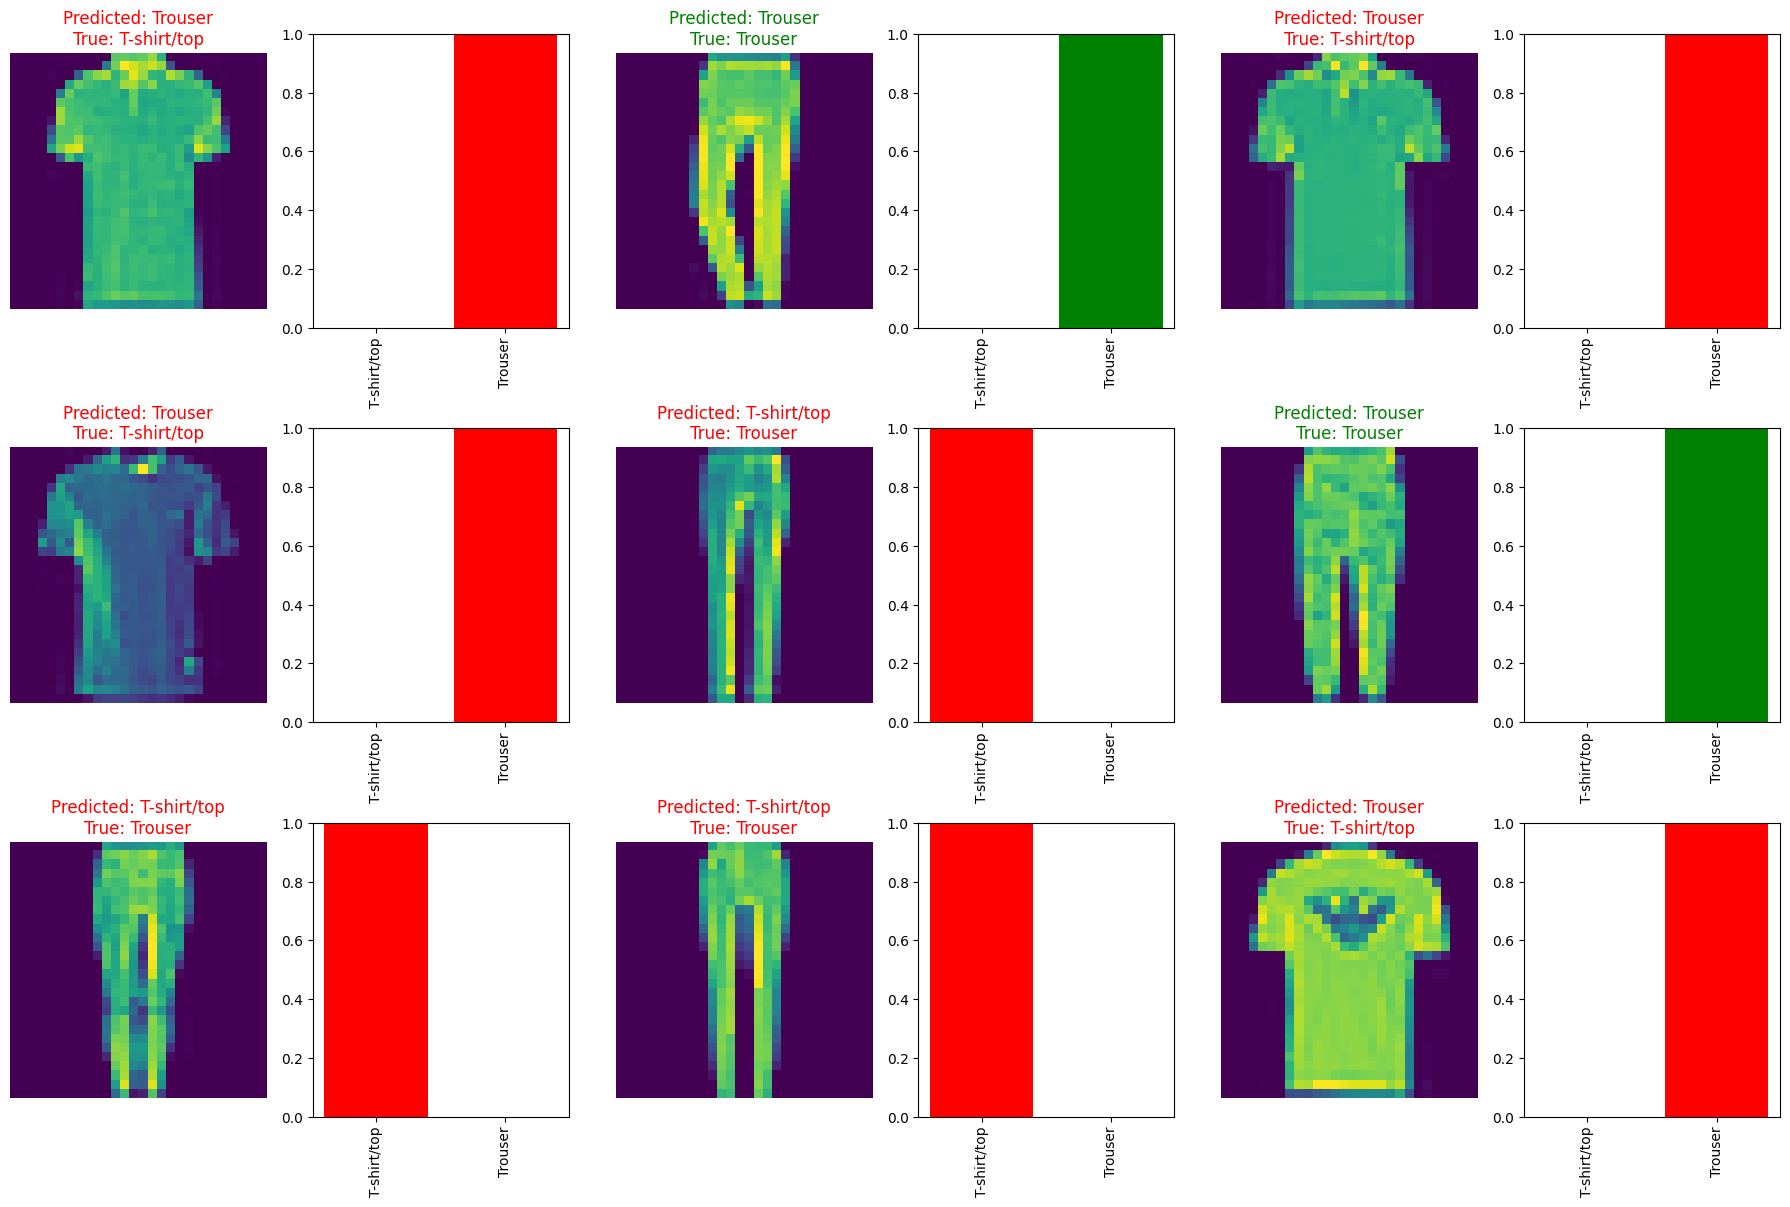

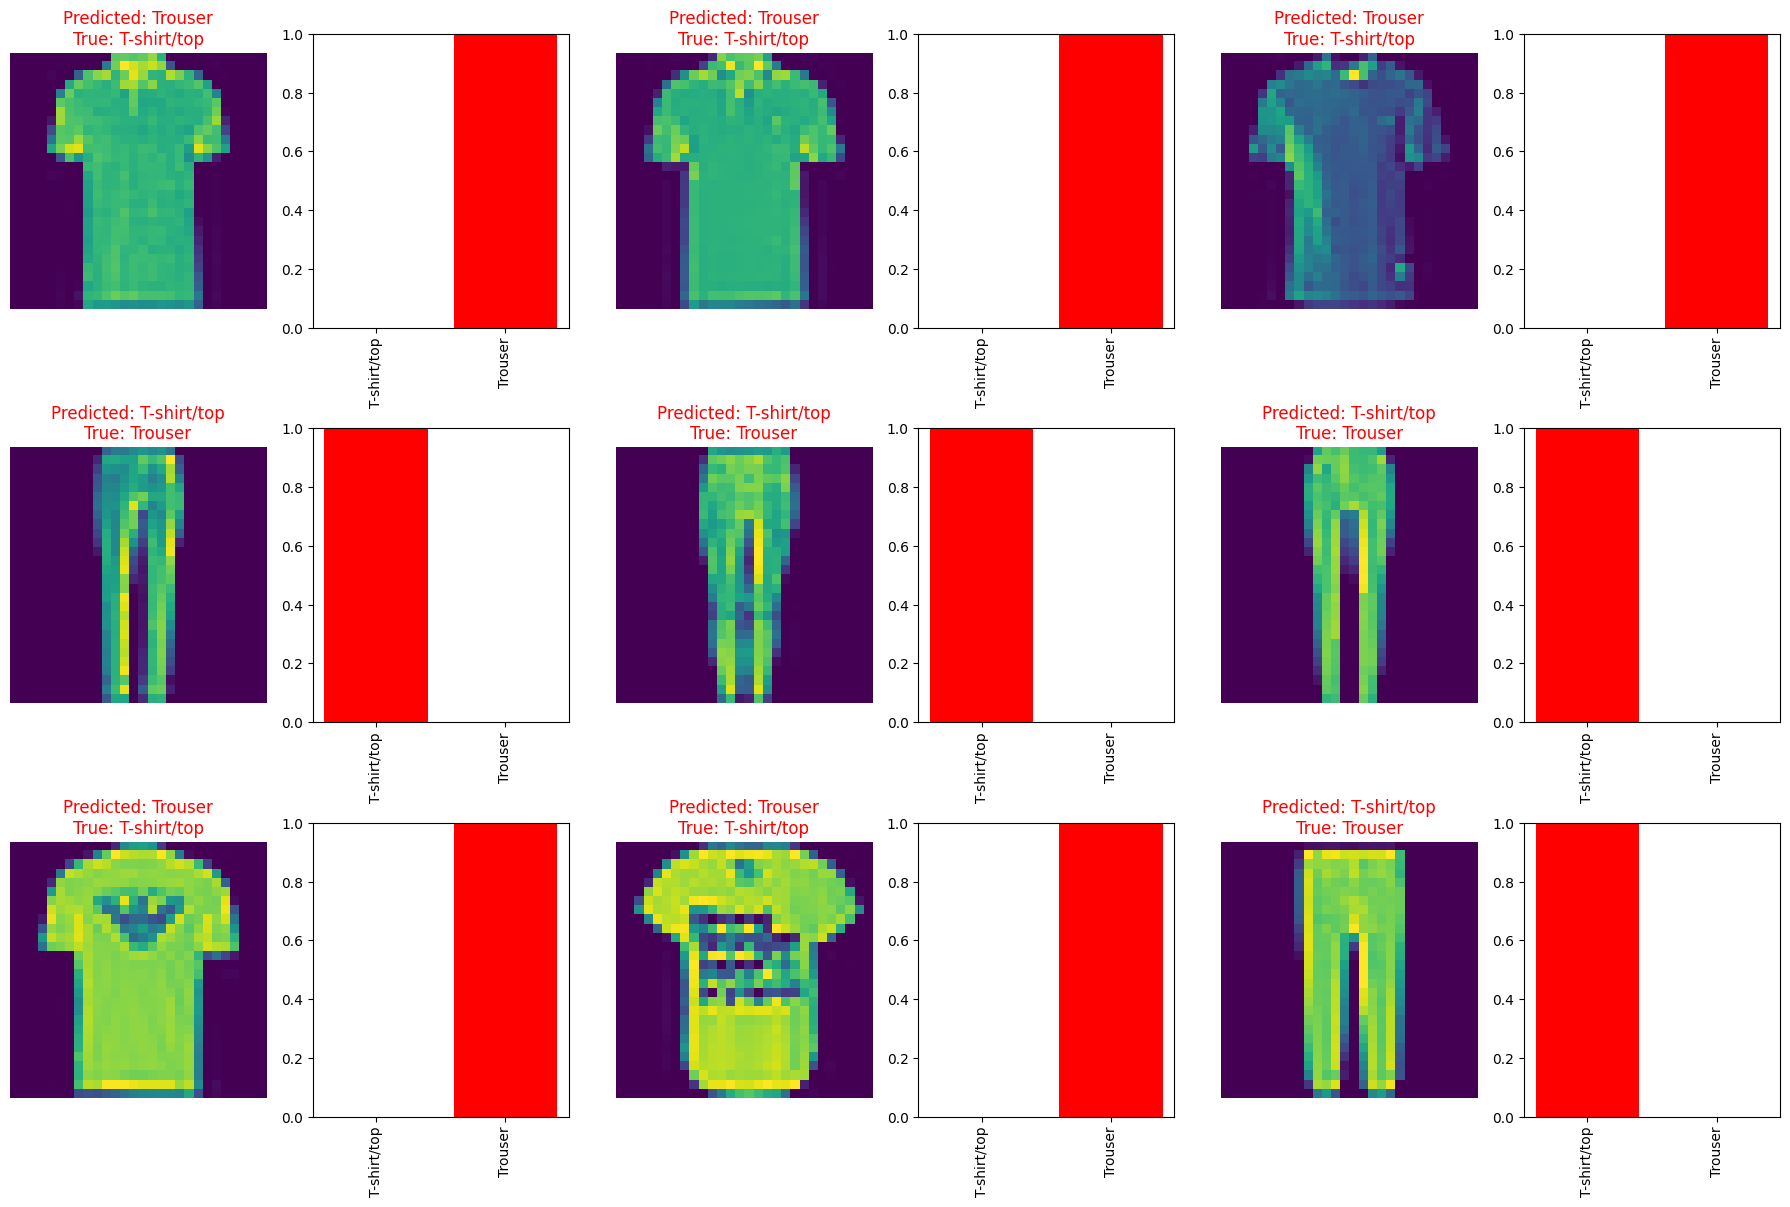

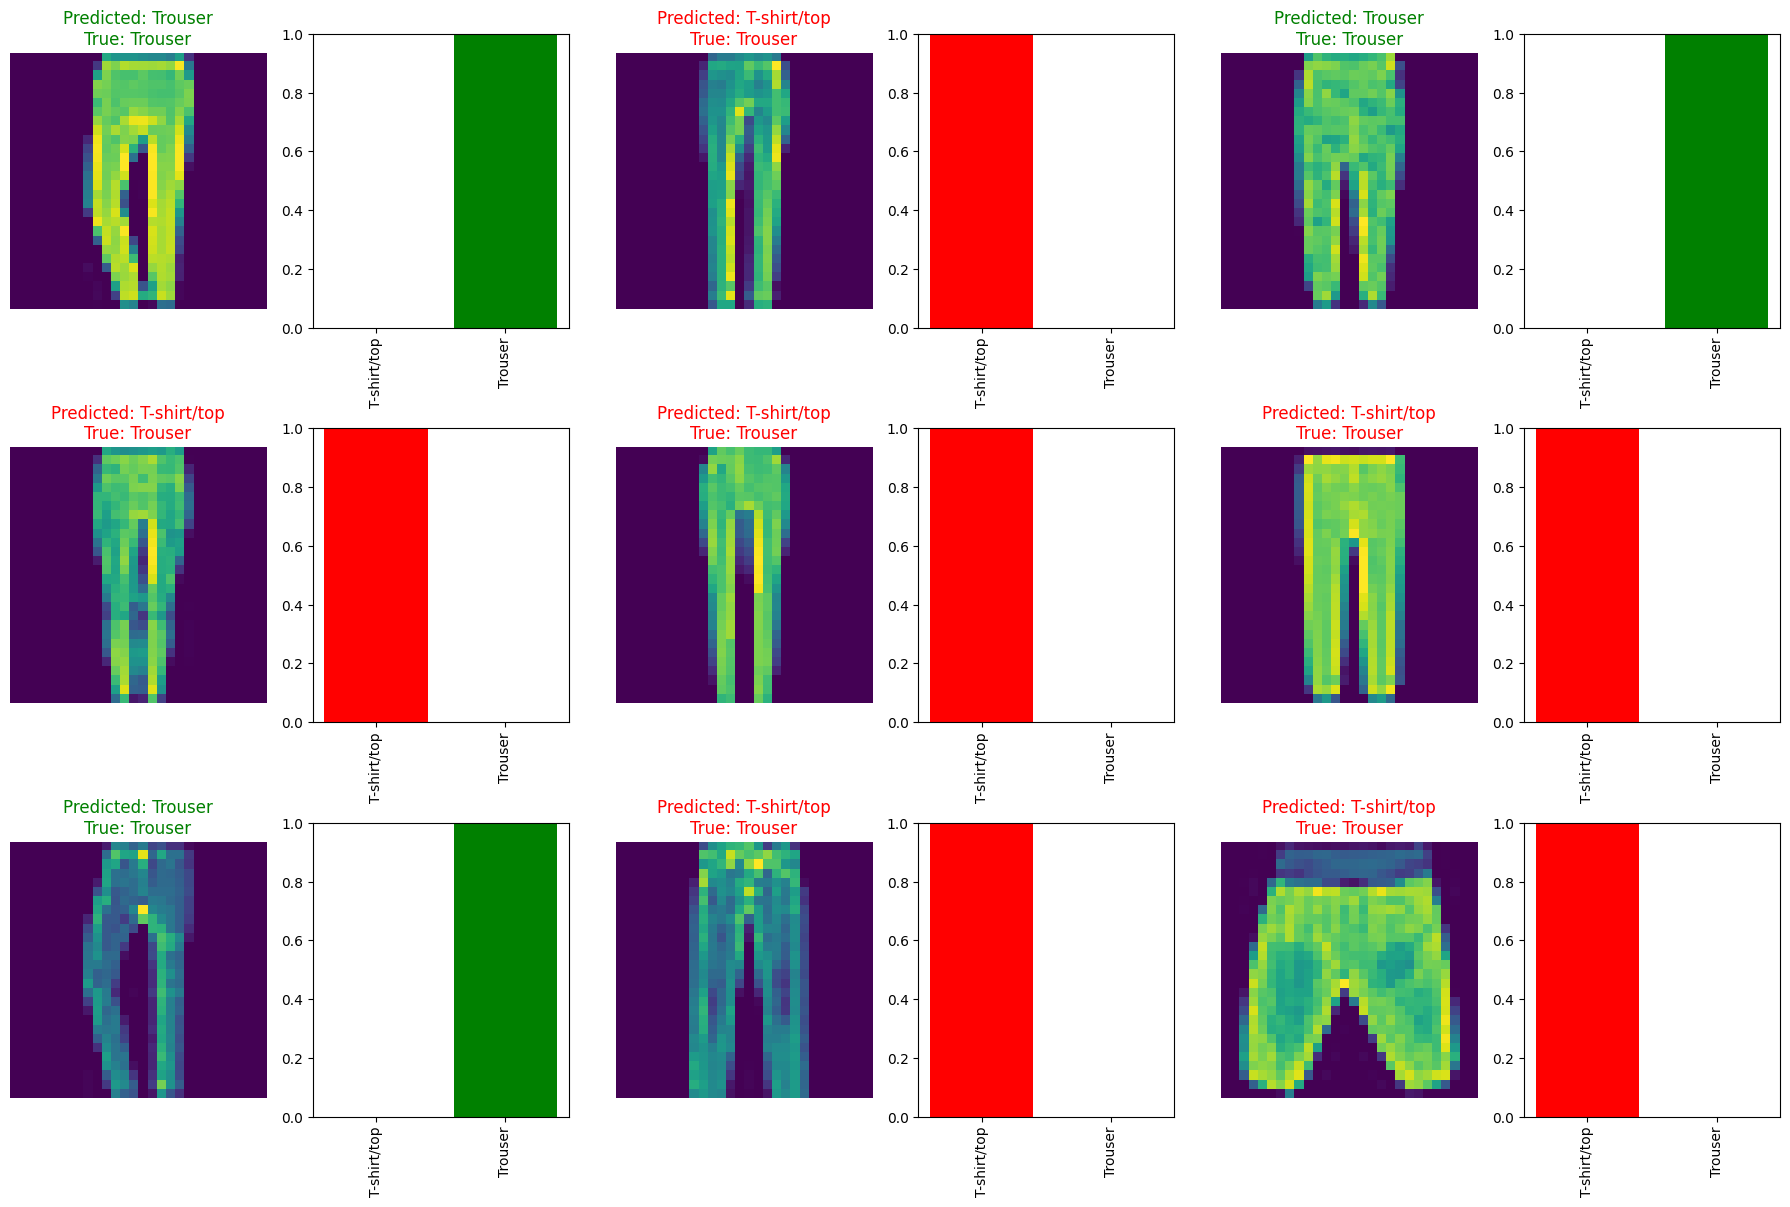

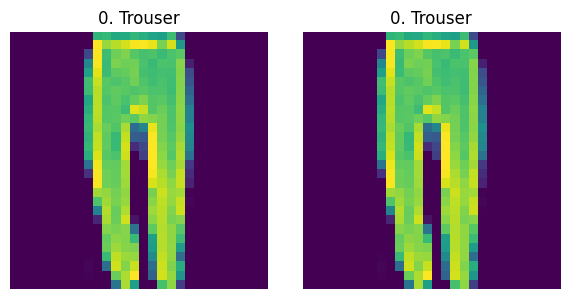

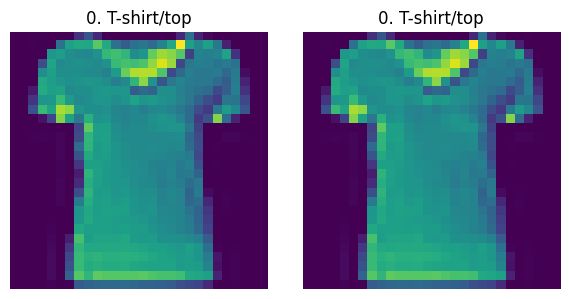

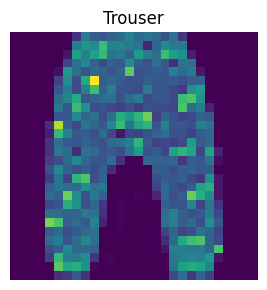

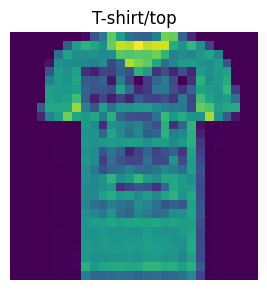

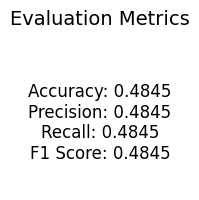

In [ ]:
importlib.reload(icv)
visualizer = icv.ImageClassifierVisualizer(["T-shirt/top", "Trouser"], is_multiclass=False)
visualizer.calculate_model_predictions(model_2, test_dataset)

figures = [
    visualizer.plot_confusion_matrix(show_plot=False, fig_size=(5, 5)),
    visualizer.plot_results(show_plot=False),
    visualizer.plot_false_results(show_plot=False),
    visualizer.plot_class_specific_results(classes=['Trouser'], show_plot=False),
    visualizer.plot_class_specific_image_comparisons(train_dataset, train_dataset, classes=['Trouser'], show_plot=False),
    visualizer.plot_image_comparisons(train_dataset, train_dataset, show_plot=False),
    visualizer.plot_class_specific_images(train_dataset, classes=['Trouser'], show_plot=False),
    visualizer.plot_images(train_dataset, show_plot=False),
    visualizer.plot_evaluation_metrics(show_plot=False)
]

for fig in figures:
    assert isinstance(fig, plt.Figure), f"Expected type plt.Figure but got {type(fig)}"